# **Perceptrón para predecir qué especie de planta es**

### Durante este documento vamos a llevar a cabo un proceso mediante el cuál, predeciremos la especie de una planta
### **¿Cómo lo vamos a lograr?** Mediante el perceptrón. La unidad básica de las redes neuronales: los perceptrones son neuronas artificiales, su figura es realmente parecida a una real, pero esta funciona con técnicas matemáticas
### En clase ya hemos programado y pasado a POO, para hacerlo más conveniente de usar en otros ejercicios como este, un perceptrón
### El profesor nos ha proporcionado el dataset dónde se encuentra la información necesaria para este ejercicio
## Comencemos!

##### 1.- Importar las librerías necesarias 

In [4]:
#Importar la librerías
import pandas as pd

##### 2.- Crear el dataframe a partir del dataset proporcionado

In [6]:
#Crear el dataset a partir de la ruta especificada
df_iris=pd.read_csv('IRIS.csv')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##### 3.- Exploraremos el dataframe con el propósito de conocerlo mejor y trabajar mejor con él

In [8]:
#Conoceremos la dimensión del dataframe
df_iris.shape

(150, 5)

In [10]:
#Conoceremos los tipos de datos del dataframe
df_iris.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [12]:
print(df_iris.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


###### Podemos observar que el dataset es pequeño, en comparación con algunos otros que hemos trabajado. Tiene 150 registros mediante 5 columnas, una es un index, las 4 siguientes son de tipo float (con decimales) y por último la especie de la planta es de tipo objeto (cadena)
###### Existen 3 especies en la columna 'species' pero, el profesor pide que el perceptrón sea binario: que solo regrese una predicción con dos posibles caminos: 'sepal length' y 'petal length'. Por lo que vamos a seguir la siguiente estrategia: vamos a limpiar el dataset para dejarlo listo para trabajar, después procederemos a convertir las dos especies sobrantes a números, y después, vamos a pasar al perceptrón
###### Ahora, vamos a dejar el dataframe listo, limpio y vectorizado

In [14]:
#Detectar datos nulos
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
#Ver cuántas especies hay 
especies = df_iris['species'].unique()
print(especies)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [18]:
#Obtener los porcentajes de cada especie: 'Iris-Setosa'
conteo_especies = df_iris['species'].value_counts()
print(conteo_especies)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [20]:
#Eliminaremos los registros de la especie que no tomaremos en cuenta
df_iris = df_iris[df_iris['species'] != 'Iris-virginica']

In [22]:
#Vamos a hacer de nuevo el proceso pasado para ver si funcionó la limpieza
especies = df_iris['species'].unique()
print(especies)
conteo_especies = df_iris['species'].value_counts()
print(conteo_especies)

['Iris-setosa' 'Iris-versicolor']
species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64


### **Graficaremos los datos en una gráfica de dispersión (scatter), solo con las dos especies que necesitamos**

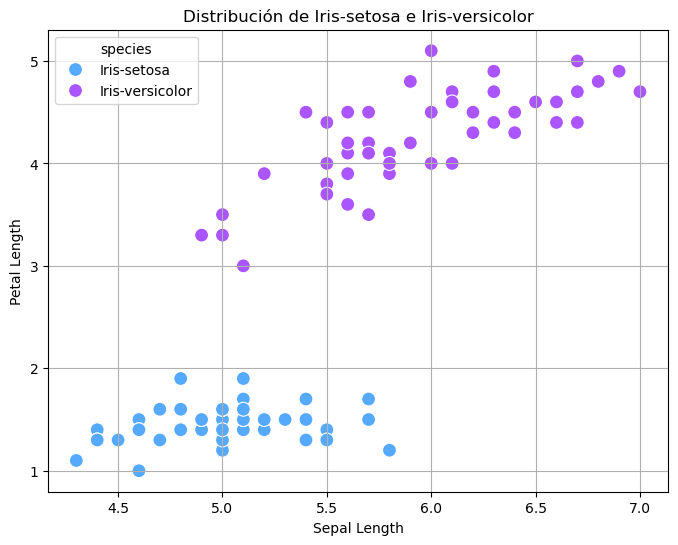

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar los datos usando seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_iris, x='sepal_length', y='petal_length', hue='species', palette='cool', s=100)

# Etiquetas y título
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Distribución de Iris-setosa e Iris-versicolor')
plt.grid(True)

# Mostrar la gráfica
plt.show()


##### Hasta el momento, nos damos cuenta en esta gráfica que mediante el tamaño de los pétalos y de los sépalos, podemos diferenciar a una planta de la otra: tienen diferentes tamaños! Ahora tenemos parámetros útiles para entrenar nuestro perceptrón!

#### Pero primero, vamos a convertir los datos tipo object en numéricos: ya que solo tenemos dos especies, una va a ser 0, otra 1.Y con eso podemos comenzar a trabajar


In [26]:
df_irisf = df_iris.replace({'species': {'Iris-setosa': 0, 'Iris-versicolor': 1}})

C:\Users\Administrador\AppData\Local\Temp\ipykernel_1652\1403524215.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_irisf = df_iris.replace({'species': {'Iris-setosa': 0, 'Iris-versicolor': 1}})


In [28]:
df_irisf

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


### Uso del perceptrón

#### Ahora, vamos a entrenar el perceptrón: según la gráfica scatter:
#### Iris-Setosa: petal_length<2.5 y sepal_length<6.0
#### Iris-Versicolor: petal_length>2.5 y sepal_length>4.5

In [30]:
#Inputs y Labels
inputs = df_irisf[['sepal_length', 'petal_length']].values 
labels = df_irisf['species'].values 

In [32]:
# Definición de hiperparametros
learning_rate = 0.05
epochs = 15
weights = [0.356, 0.259]
bias = 0.122

In [34]:
# Definir la clase Perceptron
class Perceptron():
    def __init__(self, inputs, labels, learning_rate, weights, bias, epochs=20):
        self.inputs = inputs
        self.labels = labels
        self.learning_rate = learning_rate
        self.weights = weights
        self.bias = bias
        self.epochs = epochs

    # Método de predicción
    def predict(self, input_x, weights_ajustados, bias_ajustado):
        # Calcular Z
        z = np.dot(input_x, weights_ajustados) + bias_ajustado
        # Obtener y_pred
        y_pred = self.activation(z)
        return y_pred
    
    # Función de activación
    def activation(self, z):
        return 1 if z > 0 else 0

    # Crear la funcion de entrenamiento
    def fit(self):
        # weights = [0.356, 0.259]
        # bias = 0.122

        
    
        # Iteraciones que realizará de acuerdo a las epochs
        for epoch in range(self.epochs):
            print(f"Epoch {epoch+1} / {self.epochs}", end=" ")

            total_error = 0
            # Leer las entradas en cada epoch
            for input, label in zip(self.inputs,self.labels):
                # print(f"Input: {input}, Label:{label}", end=" ")
                # Calcular Z
                z = np.dot(input, self.weights) + self.bias
                # Obtener y_pred
                y_pred = self.activation(z)
                # Calcular el error
                error = label - y_pred
                total_error += abs(error)
                # print(f"Error: {error}")
                
                # Actualizar los pesos y bias
                delta_w = self.learning_rate * error * input
                self.weights = self.weights + delta_w

                delta_bias = self.learning_rate * error
                self.bias = self.bias + delta_bias
                
            # Calcular el error promedio
            average_error = total_error / len(self.inputs)
            print(f"Average promedio: {average_error}")
            
        # Regresar los pesos y bias ajustados
        return self.weights, self.bias

In [36]:

# Crear el objeto perceptron
perceptron = Perceptron(inputs, labels, learning_rate, weights, bias, epochs)


In [38]:
# Entrenar el perceptron
import numpy as np
w,b = perceptron.fit()

Epoch 1 / 15 Average promedio: 0.03
Epoch 2 / 15 Average promedio: 0.03
Epoch 3 / 15 Average promedio: 0.01
Epoch 4 / 15 Average promedio: 0.0
Epoch 5 / 15 Average promedio: 0.0
Epoch 6 / 15 Average promedio: 0.0
Epoch 7 / 15 Average promedio: 0.0
Epoch 8 / 15 Average promedio: 0.0
Epoch 9 / 15 Average promedio: 0.0
Epoch 10 / 15 Average promedio: 0.0
Epoch 11 / 15 Average promedio: 0.0
Epoch 12 / 15 Average promedio: 0.0
Epoch 13 / 15 Average promedio: 0.0
Epoch 14 / 15 Average promedio: 0.0
Epoch 15 / 15 Average promedio: 0.0


#### Probar predicciones con ejemplos de flores

In [42]:
#Ejemplos
#Usaremos arreglos con dos niveles para lograrlo, dos para setosas y una para versicolor
# Deberían ser Setosas, 0
ejemplo1 = [5.0, 1.5]  
ejemplo2 = [4.6, 1.9] 
# Debería ser Versicolor,1 
ejemplo3 = [6.0, 4.5]  

print(f"Predicción para {ejemplo1} --> {perceptron.predict(ejemplo1, w, b)}")
print(f"Predicción para {ejemplo2} --> {perceptron.predict(ejemplo2, w, b)}")
print(f"Predicción para {ejemplo3} --> {perceptron.predict(ejemplo3, w, b)}")


Predicción para [5.0, 1.5] --> 0
Predicción para [4.6, 1.9] --> 0
Predicción para [6.0, 4.5] --> 1


## La predicción fue correcta!
### Genial! Ahora, una forma de ver si todo está en orden, es hacer una gráfica scatter de la distribución dada por el perceptrón, y otra es calcular directamente su eficiencia, vayamos a ello!

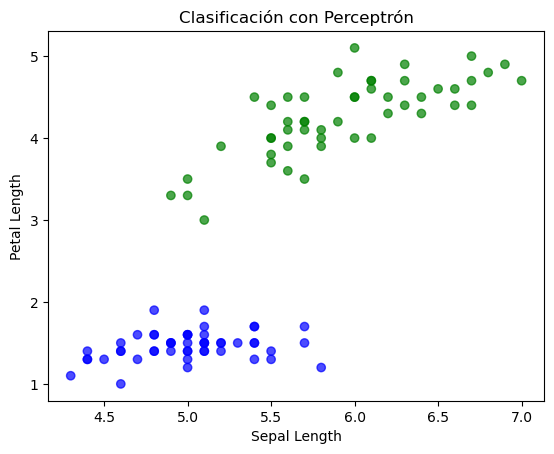

In [45]:
# Visualización de la segmentación del perceptrón
colores = ['blue' if label == 0 else 'green' for label in labels]
plt.scatter(inputs[:, 0], inputs[:, 1], c=colores, alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Clasificación con Perceptrón')
plt.show()

#### La gráfica salió prácticamente igual! deducimos que el perceptrón está trabajando muy bien! vamos a comprobarlo!

In [48]:
#Obtener el porcentaje de confiabilidad
predicciones = np.array([perceptron.predict(x, w, b) for x in inputs])

accuracy = np.mean(predicciones == labels) * 100  # Porcentaje
print(f'Precisión del perceptrón: {accuracy:.2f}%')


Precisión del perceptrón: 100.00%


### Me resulta extraño que me haya salido el 100% así que le pregunté a chatgpt (le di contexto) y que mi análisis fue lineal (si fue así) y que por ello es totalmente viable, así que supongo yo que dado que la gráfica está igual, los resultados fueron correctos y la fiabilidad salió alta, si puede tener tanta confiabilidad